# Capstone Project

In [4]:
##Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [5]:
##Read data file that will be used for the project
df = pd.read_csv('data/flight_delays.csv')
df.head()          

,FlightID,Airline,FlightNumber,Origin,Destination,ScheduledDeparture,ActualDeparture,ScheduledArrival,ActualArrival,DelayMinutes,DelayReason,Cancelled,Diverted,AircraftType,TailNumber,Distance
0,1,United,4558,ORD,MIA,9/1/2024 8:11,9/1/2024 8:30,9/1/2024 12:11,9/1/2024 12:19,8,Weather,True,False,Boeing 737,N71066,1031
1,2,Delta,8021,LAX,MIA,9/1/2024 10:25,9/1/2024 10:41,9/1/2024 13:25,9/1/2024 13:27,2,Air Traffic Control,True,True,Airbus A320,N22657,1006
2,3,Southwest,7520,DFW,SFO,9/1/2024 16:53,9/1/2024 17:05,9/1/2024 17:53,9/1/2024 18:07,14,Weather,True,True,Boeing 737,N95611,2980
3,4,Delta,2046,ORD,BOS,9/1/2024 14:44,9/1/2024 15:04,9/1/2024 18:44,9/1/2024 18:34,-10,NaN,False,False,Boeing 777,N90029,1408
4,5,Delta,6049,LAX,SEA,9/1/2024 1:51,9/1/2024 2:08,9/1/2024 5:51,9/1/2024 6:15,24,Air Traffic Control,False,True,Boeing 737,N27417,2298


In [22]:
##No.of Records and Columns in the file 
df.shape

(1747627, 16)

In [23]:
##Structure of the file 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1747627 entries, 0 to 1747626
Data columns (total 16 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   FlightID            int64 
 1   Airline             object
 2   FlightNumber        int64 
 3   Origin              object
 4   Destination         object
 5   ScheduledDeparture  object
 6   ActualDeparture     object
 7   ScheduledArrival    object
 8   ActualArrival       object
 9   DelayMinutes        int64 
 10  DelayReason         object
 11  Cancelled           bool  
 12  Diverted            bool  
 13  AircraftType        object
 14  TailNumber          object
 15  Distance            int64 
dtypes: bool(2), int64(4), object(10)
memory usage: 190.0+ MB


In [6]:
# Dropping the columns as these will not be used for modeling
df = df.drop(columns=['FlightID', 'TailNumber'])

In [25]:
##Find out number of nulls in each column
df.isnull().sum()

Airline                    0
FlightNumber               0
Origin                     0
Destination                0
ScheduledDeparture         0
ActualDeparture            0
ScheduledArrival           0
ActualArrival              0
DelayMinutes               0
DelayReason           468873
Cancelled                  0
Diverted                   0
AircraftType               0
Distance                   0
dtype: int64

In [7]:
## Update missing values NaN with Other reasons
# Fill NaN values in DelayReason with 'Other Reasons'
df['DelayReason'] = df['DelayReason'].fillna('Other Reasons')

In [8]:
# Count NaN value after filling values for Delay Reasons = 'Other Reasons'
nan_counts = df[df['DelayReason'].isna()].groupby('Airline').size().reset_index(name='Count')
nan_counts['DelayReason'] = 'NaN'
nan_counts.shape
nan_counts.head()

,Airline,Count,DelayReason


In [9]:
##Find out number of Unique Airlines in the data set
# Get distinct airlines
distinct_airlines = df['Airline'].unique()

# Print the distinct airlines
print(distinct_airlines)
# Count occurrences of each delay reason by airline, including NaN
delay_counts = df.groupby(['Airline', 'DelayReason']).size().reset_index(name='Count')
delay_counts.head()

['United' 'Delta' 'Southwest' 'American Airlines']


,Airline,DelayReason,Count
0,American Airlines,Air Traffic Control,14603
1,American Airlines,Maintenance,14619
2,American Airlines,Other Reasons,15971
3,American Airlines,Weather,14464
4,Delta,Air Traffic Control,14648


In [10]:
# Combine the counts into a single DataFrame
combined_counts = pd.concat([delay_counts, nan_counts], ignore_index=True)

# Display the unique delay reasons along with their counts for each airline
print("Unique Delay Reasons and their Counts by Airline (including NaN):")
for index, row in combined_counts.iterrows():
    print(f"{row['Airline']} - {row['DelayReason']}: {row['Count']}")


Unique Delay Reasons and their Counts by Airline (including NaN):
American Airlines - Air Traffic Control: 14603
American Airlines - Maintenance: 14619
American Airlines - Other Reasons: 15971
American Airlines - Weather: 14464
Delta - Air Traffic Control: 14648
Delta - Maintenance: 14647
Delta - Other Reasons: 15932
Delta - Weather: 14503
Southwest - Air Traffic Control: 14858
Southwest - Maintenance: 14660
Southwest - Other Reasons: 16101
Southwest - Weather: 14677
United - Air Traffic Control: 14760
United - Maintenance: 14574
United - Other Reasons: 15934
United - Weather: 14631


In [ ]:
df.head()

In [11]:
# Calculate delay in minutes
df['DelayMinutes'] = (df['ActualDeparture'] - df['ScheduledDeparture']).dt.total_seconds() / 60

# Group by airline and find the maximum delay
max_delay_by_airline = df.groupby('Airline')['DelayMinutes'].max().reset_index()

# Print the result
print(max_delay_by_airline)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

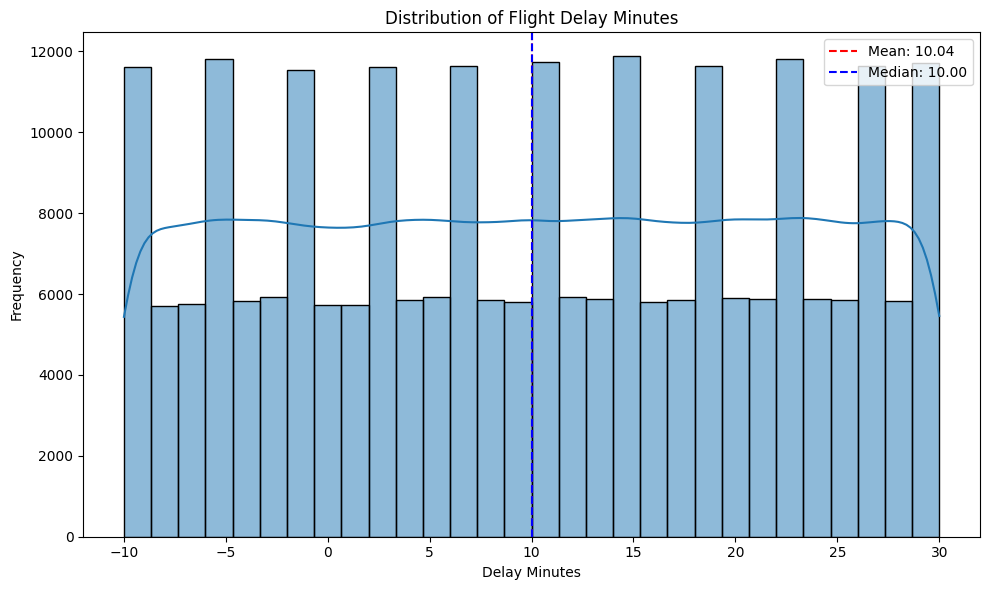

In [12]:
# Plotting the distribution of DelayMinutes
plt.figure(figsize=(10, 6))
sns.histplot(df['DelayMinutes'], bins=30, kde=True)

# Add title and labels
plt.title('Distribution of Flight Delay Minutes')
plt.xlabel('Delay Minutes')
plt.ylabel('Frequency')

# Optional: Add mean or median lines
mean_delay = df['DelayMinutes'].mean()
median_delay = df['DelayMinutes'].median()
plt.axvline(mean_delay, color='red', linestyle='--', label=f'Mean: {mean_delay:.2f}')
plt.axvline(median_delay, color='blue', linestyle='--', label=f'Median: {median_delay:.2f}')

# Add legend
plt.legend()

plt.tight_layout()

# Save the figure in the data folder
plt.savefig('data/flight_delay_distribution.png')

# Show the plot
plt.show()


Numeric Columns: ['FlightNumber', 'DelayMinutes', 'Distance']


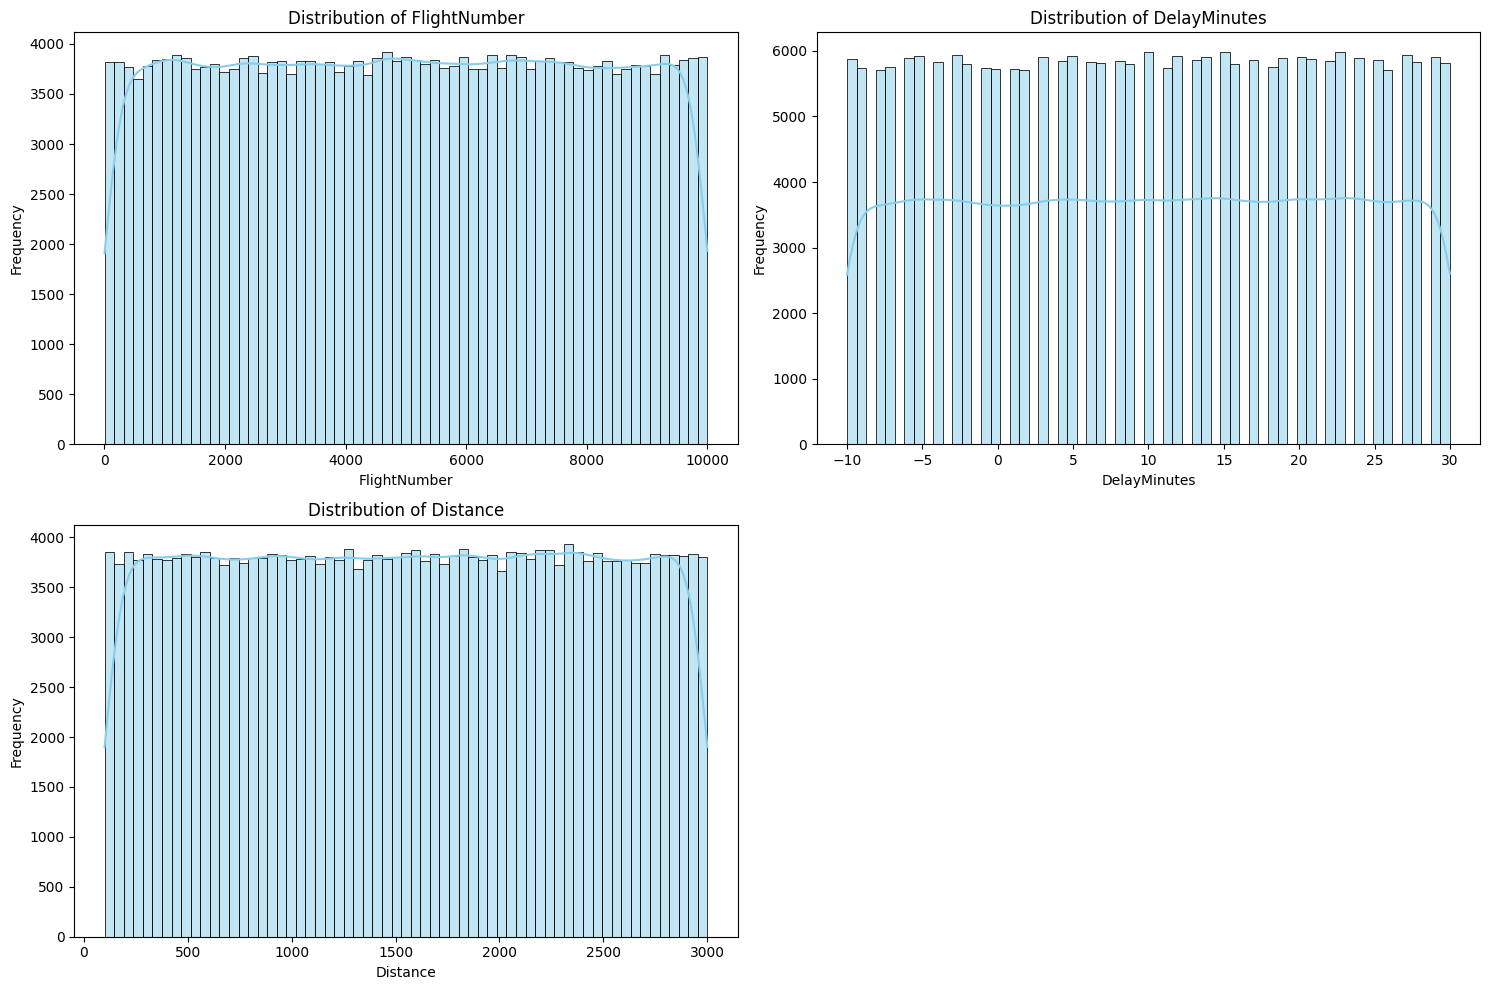

In [13]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Numeric Columns:", numeric_cols)
# Plotting distributions of numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()

# Save the figure in the data folder
plt.savefig('data/numeric_feature_distributions.png')

# Show the plots
plt.show()

Categorical Columns: ['Airline', 'Origin', 'Destination', 'ScheduledDeparture', 'ActualDeparture', 'ScheduledArrival', 'ActualArrival', 'DelayReason', 'AircraftType']


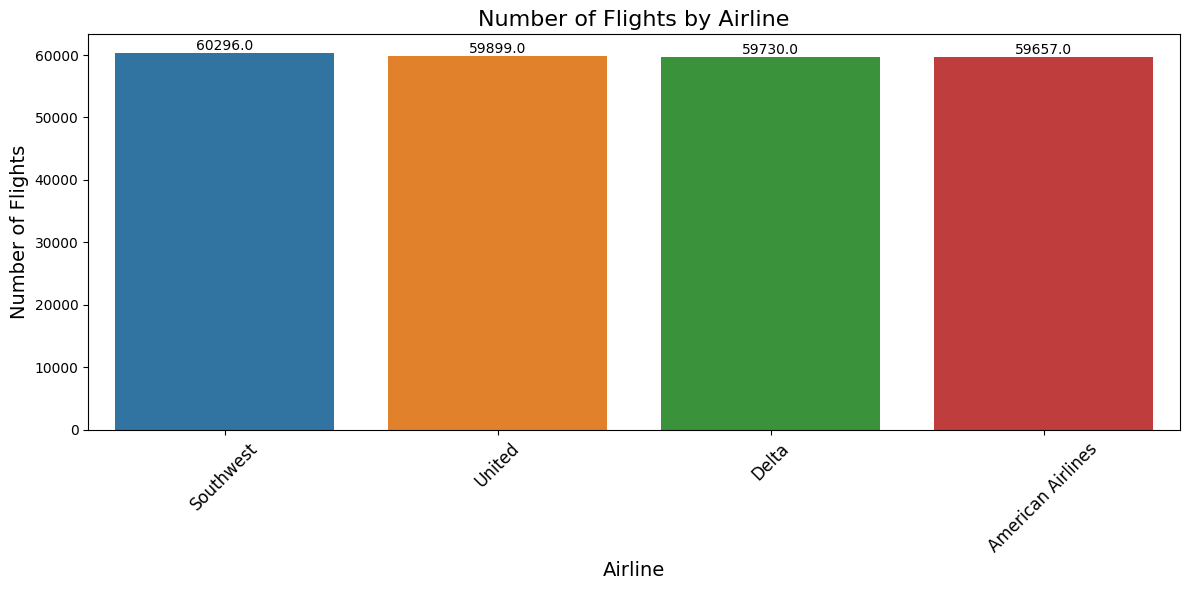

In [14]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_cols)

# Plotting the count of flights by Airline
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Airline', order=df['Airline'].value_counts().index)

# Adding title and labels
plt.title('Number of Flights by Airline', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Optional: Add data labels above bars
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Save the figure in the data folder
plt.savefig('data/flights_by_airline.png')

# Show the plot
plt.show()

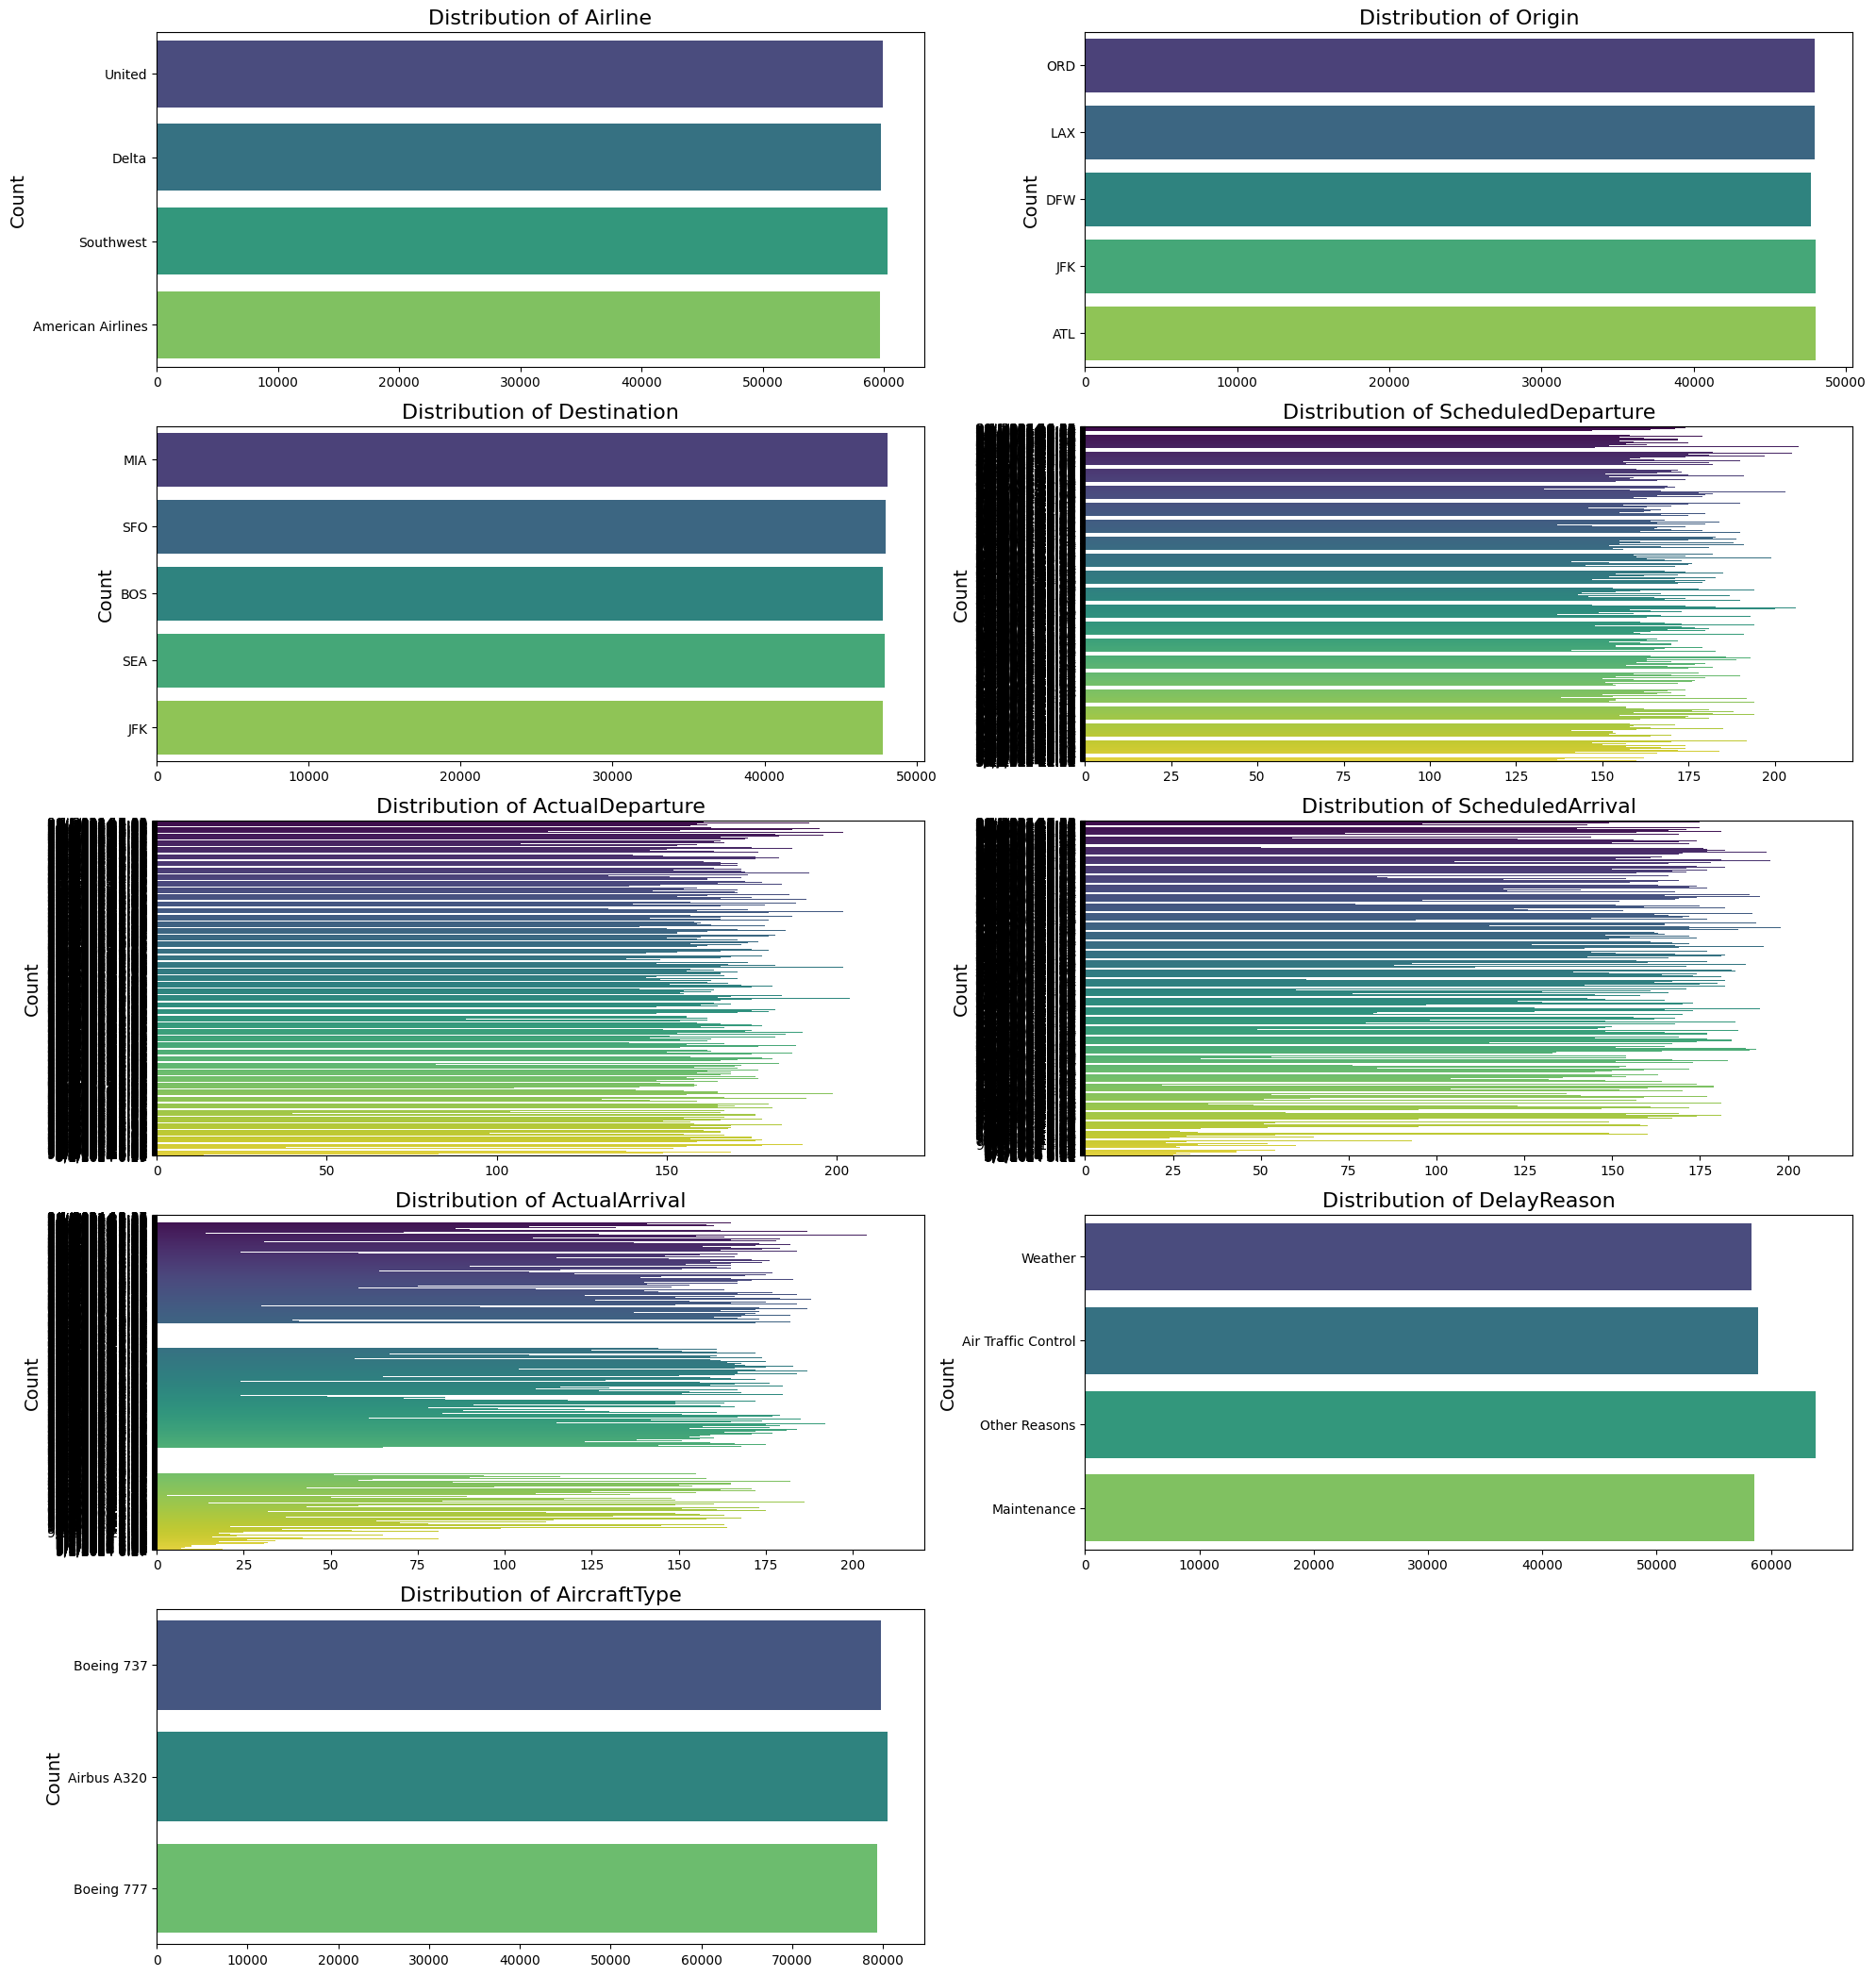

In [15]:
# Plotting distributions of categorical features specific to the airline industry
plt.figure(figsize=(20, 25))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(6, 2, i)
    sns.countplot(y=df[col], palette='viridis')
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel('')
    plt.ylabel('Count', fontsize=14)

plt.tight_layout()

# Save the figure in the data folder
plt.savefig('data/categorical_feature_distributions.png')

# Show the plots
plt.show()

In [16]:
# Identify boolean columns includes True/False values
boolean_cols = df.select_dtypes(include=['bool']).columns.tolist()

# Identify datetime columns includes columns with date and time information
# convert scheduled and actual departure/arrival times to datetime type
df['ScheduledDeparture'] = pd.to_datetime(df['ScheduledDeparture'])
df['ActualDeparture'] = pd.to_datetime(df['ActualDeparture'])
df['ScheduledArrival'] = pd.to_datetime(df['ScheduledArrival'])
df['ActualArrival'] = pd.to_datetime(df['ActualArrival'])

datetime_cols = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()

print("Boolean Columns:", boolean_cols)           
print("Datetime Columns:", datetime_cols)       


Boolean Columns: ['Cancelled', 'Diverted']
Datetime Columns: ['ScheduledDeparture', 'ActualDeparture', 'ScheduledArrival', 'ActualArrival']


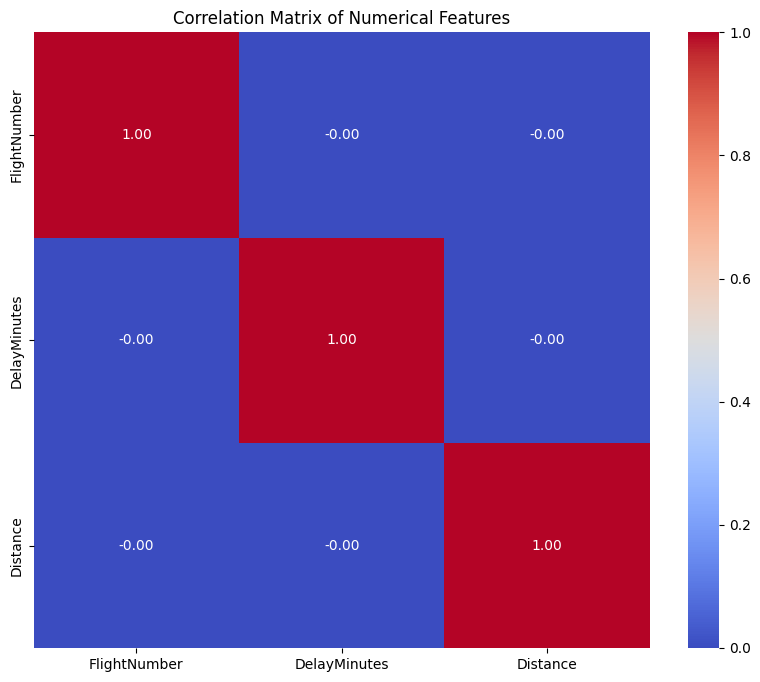

In [17]:
# Correlation Analysis for numerical features
corr_matrix = df[numeric_cols].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numerical Features')

# Save the figure in the data folder
plt.savefig('data/correlation_matrix.png')

plt.show()


In [18]:
df.describe()

# Format values to 2 decimal places
formatted_df = df.describe().copy()

formatted_df.iloc[:, 1:] = formatted_df.iloc[:, 1:].applymap(lambda x: f"{x:.2f}")

# Display the formatted DataFrame
print(formatted_df)



        FlightNumber ScheduledDeparture ActualDeparture ScheduledArrival   
count  239582.000000          239582.00       239582.00        239582.00  \
mean     5002.976113                .2f             .2f              .2f   
min         1.000000                .2f             .2f              .2f   
25%      2504.000000                .2f             .2f              .2f   
50%      5003.500000                .2f             .2f              .2f   
75%      7493.000000                .2f             .2f              .2f   
max      9999.000000                .2f             .2f              .2f   
std      2885.350587                nan             nan              nan   

      ActualArrival DelayMinutes   Distance  
count     239582.00    239582.00  239582.00  
mean            .2f        10.04    1550.82  
min             .2f       -10.00     100.00  
25%             .2f         0.00     826.00  
50%             .2f        10.00    1552.00  
75%             .2f        20.00    227

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


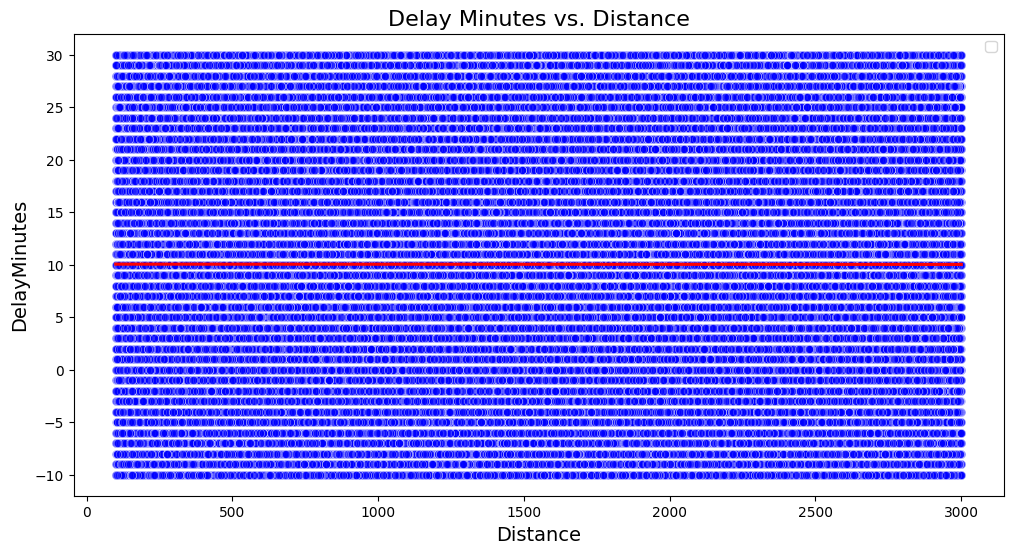

In [19]:
# Create a scatter plot to visualize the relationship between DelayMinutes and Distance
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Distance', y='DelayMinutes', alpha=0.5, color='blue')

# Adding titles and labels
plt.title('Delay Minutes vs. Distance', fontsize=16)
plt.xlabel('Distance (miles)', fontsize=14)
plt.ylabel('Delay Minutes', fontsize=14)

# Optional: Add a regression line to visualize trends
sns.regplot(data=df, x='Distance', y='DelayMinutes', scatter=False, color='red', line_kws={"label": "Regression Line"})

# Add a legend
plt.legend()

# Save the figure in the data folder
plt.savefig('data/delay_vs_distance.png')

# Show the plot
plt.show()

In [20]:
# Calculate the number of cancelled, delayed, diverted, and on-time flights for each airline
cancelled_flights_count = df.groupby('Airline')['Cancelled'].sum().reset_index(name='CancelledCount')

delayed_flights_count = df[df['DelayMinutes'] > 0].groupby('Airline')['DelayMinutes'].count().reset_index(name='DelayedCount')

diverted_flights_count = df.groupby('Airline')['Diverted'].sum().reset_index(name='DivertedCount')

# Calculate on-time flights
ontime_flights_count = df[(df['Cancelled'] == False) & (df['DelayMinutes'] <= 0)].groupby('Airline').size().reset_index(name='OnTimeCount')

# Merge all counts into a single DataFrame
combined_counts = (cancelled_flights_count
                   .merge(delayed_flights_count, on='Airline', how='outer')
                   .merge(diverted_flights_count, on='Airline', how='outer')
                   .merge(ontime_flights_count, on='Airline', how='outer'))

# Display the results
print("Number of Flights Cancelled, Delayed, Diverted, and On-Time by Each Airline:")
print(combined_counts)


Number of Flights Cancelled, Delayed, Diverted, and On-Time by Each Airline:
             Airline  CancelledCount  DelayedCount  DivertedCount  OnTimeCount
0  American Airlines           29961         43686          29972         7903
1              Delta           29779         43798          29838         8007
2          Southwest           30013         44195          30240         8003
3             United           30017         43965          29975         7987


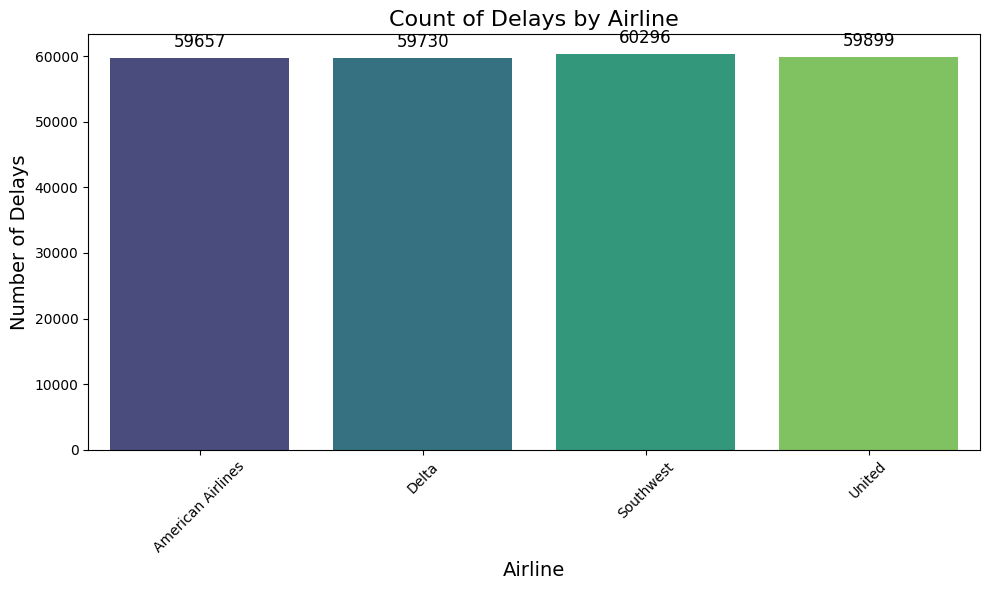

In [21]:
##Use of seaborn 
import seaborn as sns

# Count delays by airline
delay_counts = df.groupby('Airline')['DelayMinutes'].count().reset_index()
delay_counts.columns = ['Airline', 'DelayCount']

# Set up the visualization
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=delay_counts, x='Airline', y='DelayCount', palette='viridis')

# Add titles and labels
plt.title('Count of Delays by Airline', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Number of Delays', fontsize=14)
plt.xticks(rotation=45)  # Rotate x labels for better readability

# Add count labels on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=12, color='black', 
                      xytext=(0, 5),  # 5 points vertical offset
                      textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_304/2958086153.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/codio/.pyenv/versions/3.11.2/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


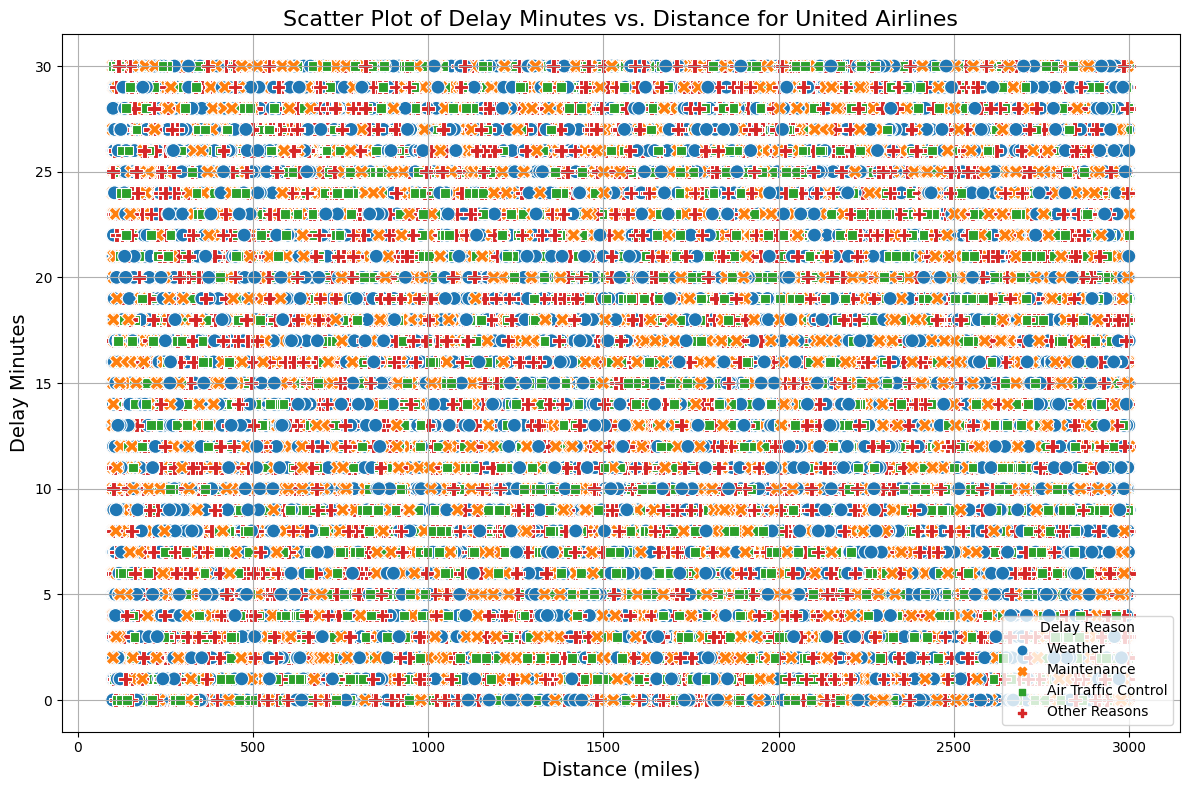

In [28]:

# Filter for United Airlines only
united_df = df[df['Airline'] == 'United']

# Create scatter plots for each delay reason
plt.figure(figsize=(12, 8))

sns.scatterplot(data=united_df, x='Distance', y='DelayMinutes', hue='DelayReason', style='DelayReason', s=100)

plt.title('Scatter Plot of Delay Minutes vs. Distance for United Airlines', fontsize=16)
plt.xlabel('Distance (miles)', fontsize=14)
plt.ylabel('Delay Minutes', fontsize=14)
plt.legend(title='Delay Reason')
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

In [22]:
# Optionally, filter for United Airlines flights
united_flights = df[df['Airline'] == 'United']
print("\nUnited Airlines Flights:")
print(united_flights[['FlightNumber', 'Origin', 'Destination', 'ScheduledDeparture', 'ActualDeparture']])


United Airlines Flights:
        FlightNumber Origin Destination  ScheduledDeparture   
0               4558    ORD         MIA 2024-09-01 08:11:00  \
12              9966    DFW         SFO 2024-09-01 05:33:00   
13               598    ATL         SEA 2024-09-01 07:30:00   
16              2978    LAX         MIA 2024-09-01 16:23:00   
17              2966    JFK         SEA 2024-09-01 03:04:00   
...              ...    ...         ...                 ...   
239570          9790    JFK         JFK 2024-09-01 18:16:00   
239571            55    ATL         JFK 2024-09-01 13:48:00   
239574          6886    JFK         JFK 2024-09-01 02:41:00   
239575          9661    ORD         BOS 2024-09-01 18:22:00   
239576          3435    ATL         SEA 2024-09-01 12:10:00   

           ActualDeparture  
0      2024-09-01 08:30:00  
12     2024-09-01 05:58:00  
13     2024-09-01 07:31:00  
16     2024-09-01 16:48:00  
17     2024-09-01 03:11:00  
...                    ...  
239570 2024-09

In [23]:
flights_df = pd.DataFrame(df)

# Convert departure and arrival times to datetime
flights_df['ActualDeparture'] = pd.to_datetime(flights_df['ActualDeparture'])
flights_df['ActualArrival'] = pd.to_datetime(flights_df['ActualArrival'])

# Calculate time taken in minutes
flights_df['TimeTakenMinutes'] = (flights_df['ActualArrival'] - flights_df['ActualDeparture']).dt.total_seconds() / 60

# Filter for United Airlines flights
united_flights = flights_df[flights_df['Airline'] == 'United']

# Group and sort by distance
grouped_flights = united_flights.sort_values(by='Distance', ascending=False)

# Display the relevant information
print("United Airlines Flights (Longest to Shortest Distance):")
print(grouped_flights[['FlightNumber', 'Origin', 'Destination', 'Distance', 'TimeTakenMinutes']])

United Airlines Flights (Longest to Shortest Distance):
        FlightNumber Origin Destination  Distance  TimeTakenMinutes
37452           3539    ORD         BOS      3000              49.0
154579           710    JFK         SEA      3000             323.0
180755          3268    DFW         SEA      3000             352.0
224757          1350    ORD         MIA      3000              24.0
59271           3435    ATL         BOS      3000             232.0
...              ...    ...         ...       ...               ...
217603          8863    ATL         MIA       100             240.0
205845          1378    ORD         JFK       100             167.0
87377           8409    ORD         SEA       100             356.0
103725          7462    ATL         SFO       100              58.0
227641          8627    JFK         MIA       100              67.0

[59899 rows x 5 columns]


/tmp/ipykernel_429/170713707.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  united_flights['DistanceGroup'] = pd.cut(united_flights['Distance'], bins=bins, labels=labels, right=False)


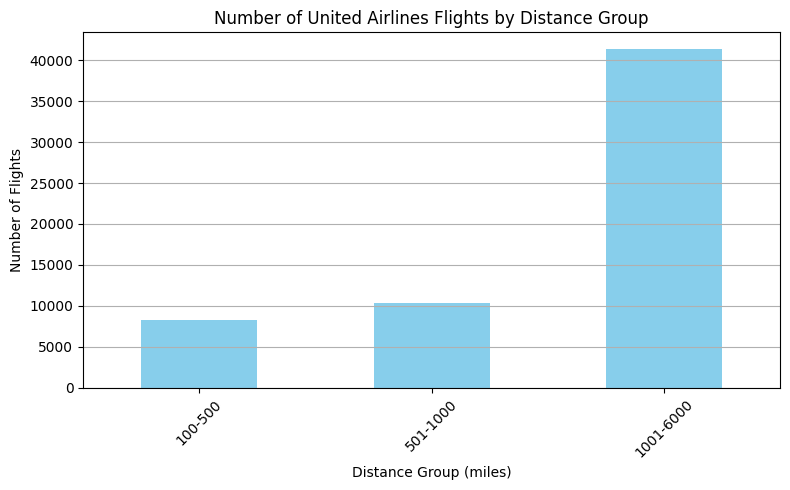

In [24]:

# Filter for United Airlines flights
united_flights = flights_df[flights_df['Airline'] == 'United']

# Define distance bins and labels
bins = [0, 500, 1000, 6000]
labels = ['100-500', '501-1000', '1001-6000']

# Create a new column for distance bins
united_flights['DistanceGroup'] = pd.cut(united_flights['Distance'], bins=bins, labels=labels, right=False)

# Count the number of flights in each distance group
distance_counts = united_flights['DistanceGroup'].value_counts().sort_index()

# Create a bar plot for distance groups
plt.figure(figsize=(8, 5))
distance_counts.plot(kind='bar', color='skyblue')
plt.title('Number of United Airlines Flights by Distance Group')
plt.xlabel('Distance Group (miles)')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


/tmp/ipykernel_429/2037630048.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_flights['DistanceGroup'] = pd.cut(airline_flights['Distance'], bins=bins, labels=labels, right=False)


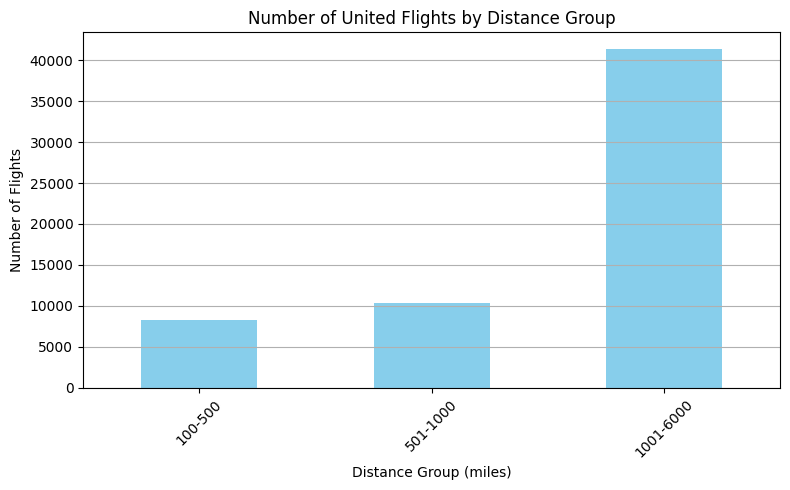

/tmp/ipykernel_429/2037630048.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_flights['DistanceGroup'] = pd.cut(airline_flights['Distance'], bins=bins, labels=labels, right=False)


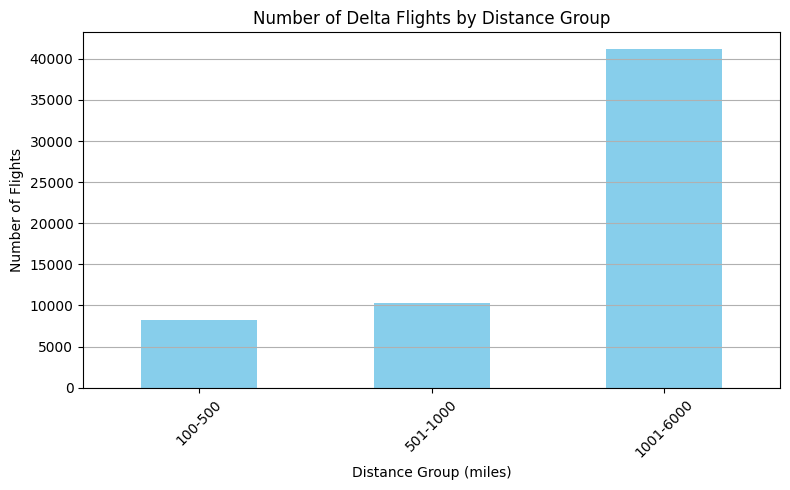

/tmp/ipykernel_429/2037630048.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_flights['DistanceGroup'] = pd.cut(airline_flights['Distance'], bins=bins, labels=labels, right=False)


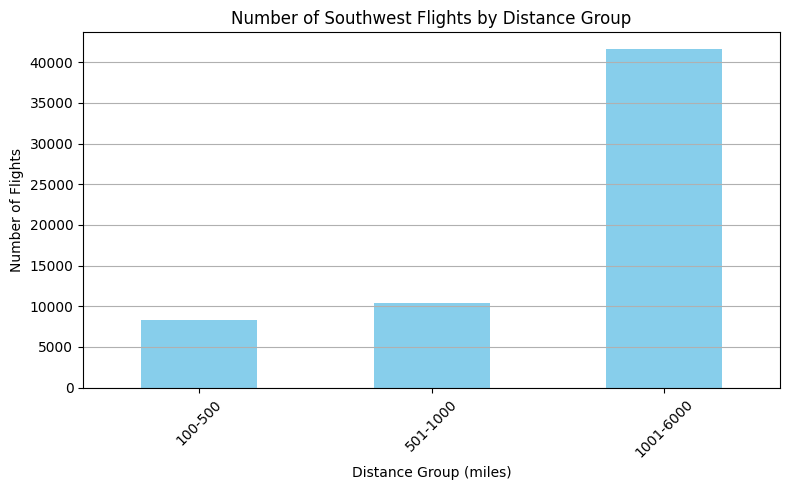

/tmp/ipykernel_429/2037630048.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_flights['DistanceGroup'] = pd.cut(airline_flights['Distance'], bins=bins, labels=labels, right=False)


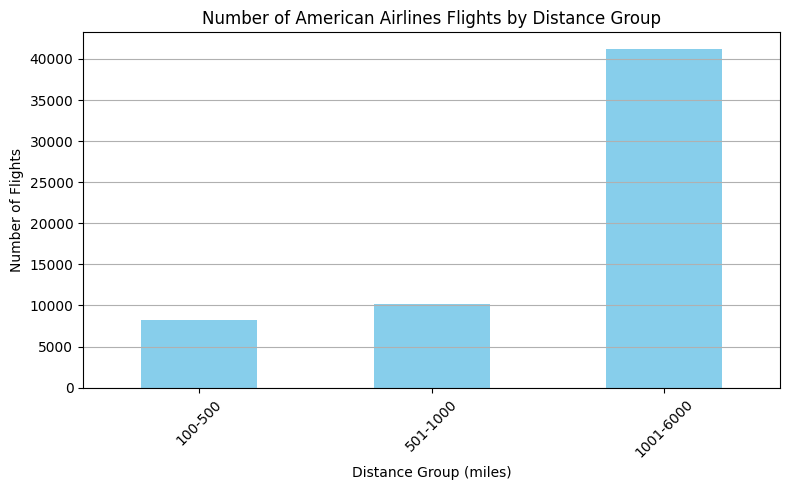

In [25]:
# Convert departure and arrival times to datetime
flights_df['ActualDeparture'] = pd.to_datetime(flights_df['ActualDeparture'])
flights_df['ActualArrival'] = pd.to_datetime(flights_df['ActualArrival'])

# Calculate time taken in minutes
flights_df['TimeTakenMinutes'] = (flights_df['ActualArrival'] - flights_df['ActualDeparture']).dt.total_seconds() / 60

# Define distance bins and labels
bins = [0, 500, 1000, 6000]
labels = ['100-500', '501-1000', '1001-6000']

# Create a new column for distance bins and plot for each airline
airlines = flights_df['Airline'].unique()

for airline in airlines:
    airline_flights = flights_df[flights_df['Airline'] == airline]
    airline_flights['DistanceGroup'] = pd.cut(airline_flights['Distance'], bins=bins, labels=labels, right=False)
    
    distance_counts = airline_flights['DistanceGroup'].value_counts().sort_index()

    # Create a bar plot for distance groups
    plt.figure(figsize=(8, 5))
    distance_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Number of {airline} Flights by Distance Group')
    plt.xlabel('Distance Group (miles)')
    plt.ylabel('Number of Flights')
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Show the plot
    plt.tight_layout()
    plt.show()


In [ ]:
##Perform Label encoding
## Perform hot-encoding

In [26]:

# Perform one-hot encoding on categorical columns
df_encoded = pd.get_dummies(df, columns=['Airline', 'Origin', 'Destination', 'DelayReason', 'AircraftType'], drop_first=True)

# Display the encoded DataFrame
print(df_encoded.head())

   FlightNumber  ScheduledDeparture     ActualDeparture    ScheduledArrival   
0          4558 2024-09-01 08:11:00 2024-09-01 08:30:00 2024-09-01 12:11:00  \
1          8021 2024-09-01 10:25:00 2024-09-01 10:41:00 2024-09-01 13:25:00   
2          7520 2024-09-01 16:53:00 2024-09-01 17:05:00 2024-09-01 17:53:00   
3          2046 2024-09-01 14:44:00 2024-09-01 15:04:00 2024-09-01 18:44:00   
4          6049 2024-09-01 01:51:00 2024-09-01 02:08:00 2024-09-01 05:51:00   

        ActualArrival  DelayMinutes  Cancelled  Diverted  Distance   
0 2024-09-01 12:19:00             8       True     False      1031  \
1 2024-09-01 13:27:00             2       True      True      1006   
2 2024-09-01 18:07:00            14       True      True      2980   
3 2024-09-01 18:34:00           -10      False     False      1408   
4 2024-09-01 06:15:00            24      False      True      2298   

   Airline_Delta  ...  Origin_ORD  Destination_JFK  Destination_MIA   
0          False  ...        True

In [27]:
# Initialize LabelEncoders
le_airline = LabelEncoder()
le_origin = LabelEncoder()
le_destination = LabelEncoder()
le_delay_reason = LabelEncoder()
le_aircraft_type = LabelEncoder()

# Fit and transform the categorical columns
df['Airline'] = le_airline.fit_transform(df['Airline'])
df['Origin'] = le_origin.fit_transform(df['Origin'])
df['Destination'] = le_destination.fit_transform(df['Destination'])
df['DelayReason'] = df['DelayReason'].fillna('Unknown')  # Handle NaN values
df['DelayReason'] = le_delay_reason.fit_transform(df['DelayReason'])
df['AircraftType'] = le_aircraft_type.fit_transform(df['AircraftType'])

# Display the encoded DataFrame
print(df.head())

   Airline  FlightNumber  Origin  Destination  ScheduledDeparture   
0        3          4558       4            2 2024-09-01 08:11:00  \
1        1          8021       3            2 2024-09-01 10:25:00   
2        2          7520       1            4 2024-09-01 16:53:00   
3        1          2046       4            0 2024-09-01 14:44:00   
4        1          6049       3            3 2024-09-01 01:51:00   

      ActualDeparture    ScheduledArrival       ActualArrival  DelayMinutes   
0 2024-09-01 08:30:00 2024-09-01 12:11:00 2024-09-01 12:19:00             8  \
1 2024-09-01 10:41:00 2024-09-01 13:25:00 2024-09-01 13:27:00             2   
2 2024-09-01 17:05:00 2024-09-01 17:53:00 2024-09-01 18:07:00            14   
3 2024-09-01 15:04:00 2024-09-01 18:44:00 2024-09-01 18:34:00           -10   
4 2024-09-01 02:08:00 2024-09-01 05:51:00 2024-09-01 06:15:00            24   

   DelayReason  Cancelled  Diverted  AircraftType  Distance  
0            3       True     False             

In [34]:
#Pre-Processing
# Split the dataset into features and target variable
X = df.drop(columns=['DelayMinutes'])  # Features
y = df['DelayMinutes']                  # Target variable

# Create train and test datasets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the results
print("Training Features:\n", X_train)
print("Testing Features:\n", X_test)
print("Training Target:\n", y_train)
print("Testing Target:\n", y_test)


Training Features:
          Airline  FlightNumber  Origin  Destination  ScheduledDeparture   
1124842        3          7866       4            4 2024-09-01 22:27:00  \
915862         3          6413       1            4 2024-09-01 12:11:00   
33706          3          6710       0            1 2024-09-01 11:14:00   
146559         3          5089       0            4 2024-09-01 17:40:00   
660177         3          1340       3            0 2024-09-01 12:06:00   
...          ...           ...     ...          ...                 ...   
259178         2          4661       1            4 2024-09-01 13:16:00   
1414414        2          4197       2            0 2024-09-01 21:42:00   
131932         3          3866       4            0 2024-09-01 14:42:00   
671155         0          1745       4            2 2024-09-01 21:15:00   
121958         3          9333       0            4 2024-09-01 13:00:00   

            ActualDeparture    ScheduledArrival       ActualArrival   
1124842 

In [28]:
# Create a binary target variable: 1 if delayed (DelayMinutes > 0), else 0
df['Delayed'] = (df['DelayMinutes'] > 0).astype(int)

# Define features and target variable
X = df.drop(columns=['DelayMinutes', 'Delayed'])  # Features
y = df['Delayed']                                  # Target variable


In [29]:

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [33]:
# Print DataFrame info to verify data types
print("DataFrame info:")
print(df.info())
# Convert datetime columns to Unix timestamps
df['ActualDeparture'] = df['ActualDeparture'].astype('int64') // 10**9  # Convert to seconds
df['ScheduledArrival'] = df['ScheduledArrival'].astype('int64') // 10**9  # Convert to seconds
df['ActualArrival'] = df['ActualArrival'].astype('int64') // 10**9  # Convert to seconds

# Define features and target
X = df.drop('Delayed', axis=1)  # Change 'Delayed' to your target variable
y = df['Delayed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Selection and Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239582 entries, 0 to 239581
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Airline             239582 non-null  int64         
 1   FlightNumber        239582 non-null  int64         
 2   Origin              239582 non-null  int64         
 3   Destination         239582 non-null  int64         
 4   ScheduledDeparture  239582 non-null  int64         
 5   ActualDeparture     239582 non-null  datetime64[ns]
 6   ScheduledArrival    239582 non-null  datetime64[ns]
 7   ActualArrival       239582 non-null  datetime64[ns]
 8   DelayMinutes        239582 non-null  int64         
 9   DelayReason         239582 non-null  int64         
 10  Cancelled           239582 non-null  bool          
 11  Diverted            239582 non-null  bool          
 12  AircraftType        239582 non-null  int64         
 13  Distance     